In [8]:
using JuMP, Gurobi, LinearAlgebra
using MosekTools
using Ipopt
using Plots

In [2]:
GRE = Gurobi.Env();

Academic license - for non-commercial use only


In [51]:
xp = rand(2,10);
npoints = size(xp,2)
n = 3
δ = 0.5;

In [52]:
#[i=1:npoints,j=1:n]

In [53]:
#y[1], x[1,1]-xp[1,1], x[2,1]-xp[2,1]

In [54]:
model = Model(with_optimizer(Ipopt.Optimizer));
@variable(model, x[1:2,1:n]>=0)
@variable(model, y[1:n,1:npoints]>=0)
@objective(model, Min, sum(y))
@constraint(model, min(y[:,:]) <= δ)
#@constraint(model, con[i=1:n,j=1:npoints], [y[i], x[1,i]-xp[1,j], x[2,i]-xp[2,j]] in SecondOrderCone())
@constraint(model, con[i=1:n,j=1:npoints], (x[1,i]-xp[1,j])^2+(x[2,i]-xp[2,j])^2 <= y[i,j]^2)
@constraint(model, con2, [(x[1,i]-x[1,k])^2+(x[2,i]-x[2,k])^2 for i=1:n for k=1:n if i!=k] .>= 4*δ^2 );

In [55]:
optimize!(model)

This is Ipopt version 3.12.10, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:        0
Number of nonzeros in inequality constraint Jacobian.:      201
Number of nonzeros in Lagrangian Hessian.............:      126

Total number of variables............................:        9
                     variables with only lower bounds:        9
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        0
Total number of inequality constraints...............:       39
        inequality constraints with only lower bounds:        6
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       33

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

In [56]:
xc = value.(x)
yv = value.(y)

3-element Array{Float64,1}:
 1.0221281832380285
 1.0446720771400784
 1.0261970270833691

In [63]:
yv

3-element Array{Float64,1}:
 1.0221281832380285
 1.0446720771400784
 1.0261970270833691

In [57]:
xc

2×3 Array{Float64,2}:
 0.408779   3.85271e-7  0.994754
 3.5859e-9  0.912634    0.810329

In [58]:
#(x[1,i]-xp[1,j])^2+(x[2,i]-xp[2,j])^2 <= y[i]^2

In [59]:
[(xc[1,i]-xc[1,k])^2+(xc[2,i]-xc[2,k])^2 for i=1:n for k=1:n if i!=k]

6-element Array{Float64,1}:
 1.0000000057727885
 1.0000000059106273
 1.0000000057727885
 1.000000009196472 
 1.0000000059106273
 1.000000009196472 

In [60]:
function circle(h, k, r)
    θ=LinRange(0, 2*π, 500)
    h .+ r*sin.(θ), k .+ r*cos.(θ)
end

circle (generic function with 1 method)

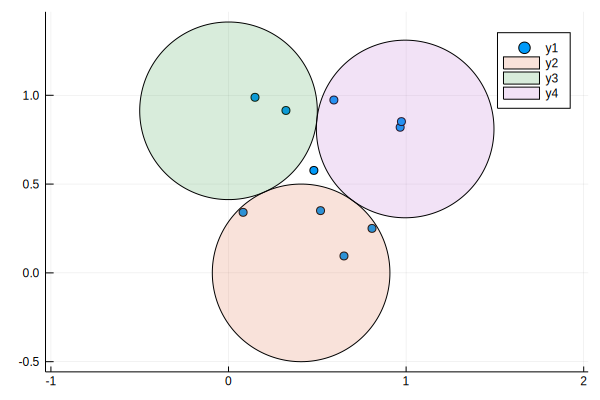

In [62]:
plot(xp[1,:],xp[2,:], seriestype=:scatter)
plot!(circle(xc[1,1],xc[2,1],δ), seriestype=[:shape], fillalpha=0.2, aspect_ratio=1)
plot!(circle(xc[1,2],xc[2,2],δ), seriestype=[:shape], fillalpha=0.2, aspect_ratio=1)
plot!(circle(xc[1,3],xc[2,3],δ), seriestype=[:shape], fillalpha=0.2, aspect_ratio=1)